# **Introduction**

Presented is a minimal working example that illustrates how to automatically generate overlays to code hot spots across various locations on a site layout -- in this case, a site picked out from Maps. Example image provided here to show potential result:

![](assets/tutorial_1_mwe.png)

<br>

# **Resource Requirements**

In this method, few resources were needed to accomplish the goals of mapping severity across campus; these resources are enumerated as follows

## Software Requirements:

In order to utilize this method, the programming language, Python, is required. Specific details about which version of Python used are as follows:

In [1]:
import sys
print("Python version")
print (sys.version)

Python version
3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]


Furthermore, this Python installation required the following packages to execute this procedure:

- Pillow (7.0.0)
- matplotlib (3.1.3)

These can be installed simply by running the following commands in a Python installation:

`pip install Pillow matplotlib`

<br>

# **Procedure**

## Software Imports

First is to import necessary packages and tools from each package; information on these tools can be found in the documentation for both `Pillow` and `matplotlib`:

In [2]:
# IMPORTING NEEDED PYTHON PACKAGES
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Previewing the Image

In this example, an arbitrary campus layout of a park was used. Here we load the image, and view the pixel dimensions of the image to later demarcate locations for heatmapping -- `matplotlib` is used in this situation to draw the Cartesian axis:

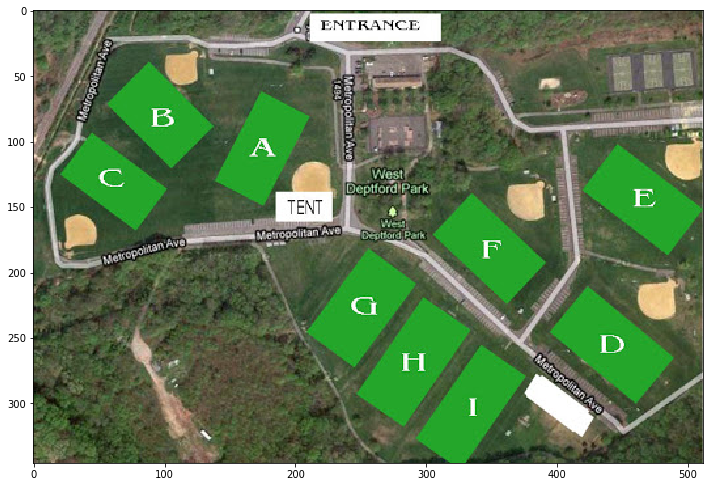

In [3]:
# PREVIEWING COORDINATE SYSTEM OF IMAGE
plt.figure(figsize=(12, 12))
img = mpimg.imread("assets/soccer_fields.jpg")
imgplot = plt.imshow(img)

## Image Processing

Using `Pillow`, we open the image of the park layout and convert this image to an RGBA image. The reason for this is that we need to utilize the alpha channel to draw transparent overlays:

In [4]:
# LOADING IMAGE INTO PILLOW
image = Image.open("assets/soccer_fields.jpg").convert("RGBA")

## Color Creation

To set the color of our shapes, we follow the following procedure (Note: the color for this example is originally set to red):

In [5]:
# SETTING COLOR AND TRANSPARENCY
color = (255, 0, 0) # SETS THE INITIAL COLOR OF AN ELLIPSE
degree_transparency = .5 # HOW TRANSPARENT; 1 MEANING FULLY, 0 MEANING NO TRANSPARENCY
opacity = int(255 * degree_transparency) # DETERMINING DEGREE OF TRANSPARENCY MASK
color = color + (opacity,) # ADDING ALPHA CHANNEL TO SELECTED COLOR

## Generating Building Locations

Selecting coordinates per each site of interest will need to be done manually by the user; in this example, I selected Site A and Site B in the park layout; here is what those coordinate labels look like:

In [6]:
# LABELING COORDINATES OF WHERE BUILDINGS ARE LOCATED
building_a = (150, 100, 200, 150)
building_b = (75, 50, 125, 125)

## Overlaying Shapes onto Image

Finally, to overlay shapes onto our original image, first a copy of the original image must be generated. On this copy, the desired drawings are overlayed:

In [7]:
# CREATING FRAME FOR OVERLAYS
overlay = Image.new("RGBA", image.size)
overlay_drawing = ImageDraw.Draw(overlay)

The ellipses around specific sites can then be drawn:

In [8]:
# DRAWING ELLIPSES AROUND BUILDINGS OF INTEREST
overlay_drawing.ellipse(building_a, fill=color, outline=(0, 0, 0))
overlay_drawing.ellipse(building_b, fill=color, outline=(0, 0, 0))

Now, to merge the original image and overlay back together and preview the final image:

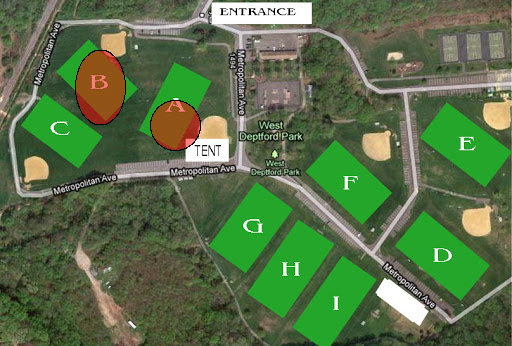

In [9]:
# COMPOSITE IMAGES TOGETHER VIA ALPHA CHANNELS
img = Image.alpha_composite(image, overlay)

img

# Conclusion

This method can be adapted to different use cases and automated to generate multiple automatic tracking mechanisms.